# Caroline's Boston Pizza Tips

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as posthoc
import matplotlib.pyplot as graph

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [2]:
# Get data
column_names = ['#', 'Tips', 'Hours', 'Date', '?']
data = pd.read_csv('data/03-10-2016-tipsee-10-31.csv', header=-1)
data.columns = column_names

# Add Tips per hour column
data['Tips per Hour'] = data['Tips'] / data['Hours']

dates = pd.to_datetime(data['Date'])
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek

# Results

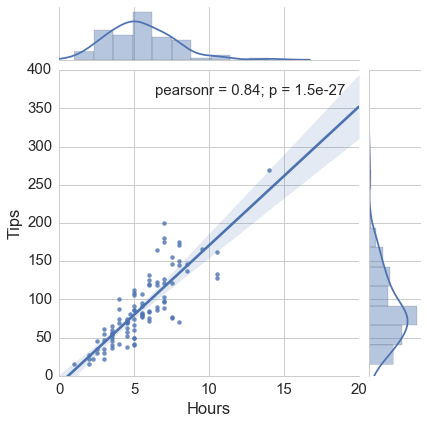

In [3]:
sns.jointplot(
    x='Hours', 
    y='Tips', 
    data=pd.DataFrame(data, columns=['Hours', 'Tips']),
    kind='reg'
)
graph.xlim([0, 20])
graph.ylim([0, 400])
graph.show()

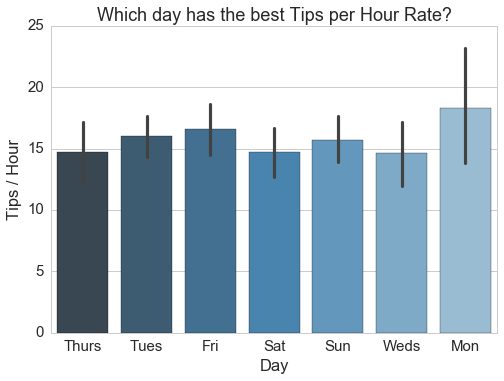

In [4]:
# Which day has the best tips per hour rate?
day_array = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

bar_graph_data = pd.DataFrame(data, columns=['Day', 'Tips per Hour'])
bar_graph_data['Day'] = bar_graph_data['Day'].apply(lambda x: day_array[x])

sns.barplot(x='Day', y='Tips per Hour', data=bar_graph_data, palette='Blues_d')
graph.title('Which day has the best Tips per Hour Rate?')
graph.ylabel('Tips / Hour')
graph.show()

In [5]:
# Run ANOVA with Post Hoc test to figure which day is significantly different
post_test = posthoc.MultiComparison(data=data['Tips per Hour'], groups=data['Day'])
posthoc_test = post_test.tukeyhsd()
print(posthoc_test)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -2.2971  -8.0582  3.4639 False 
  0      2    -3.6529  -11.4675 4.1617 False 
  0      3    -3.6197  -10.5269 3.2875 False 
  0      4    -1.7502  -7.9282  4.4279 False 
  0      5    -3.6257  -9.5265  2.2751 False 
  0      6    -2.5933  -8.3848  3.1982 False 
  1      2    -1.3558  -7.9412  5.2296 False 
  1      3    -1.3226  -6.8006  4.1554 False 
  1      4     0.547    -3.977  5.071  False 
  1      5    -1.3286   -5.466  2.8089 False 
  1      6    -0.2962  -4.2762  3.6838 False 
  2      3     0.0332  -7.5752  7.6416 False 
  2      4     1.9028  -5.0504  8.8559 False 
  2      5     0.0272  -6.6808  6.7353 False 
  2      6     1.0596  -5.5525  7.6717 False 
  3      4     1.8696  -4.0454  7.7845 False 
  3      5     -0.006  -5.6308  5.6189 False 
  3      6     1.0264  -4.4836  6.5365 False 
  4      5    -1.8755  -6.576

# Conclusion

Looks like with the data we've got there's no reason to believe that's you make more tips/hour on a particular day.

Fact of the matter is that 70.54% of the variation is explained by the number of hours worked. So if you want more tips work more... Sooo that was boring.